geochecking Debby's station, with fixed lats, lons

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
whos

Interactive namespace is empty.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from oct2py import octave
import seawater as sw
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import netCDF4 as nc
import numpy as np
import cmocean
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

In [6]:
#============================================================================#
#                              LOAD DATA                                     #
#============================================================================#
infil = np.loadtxt('../DATASETS/2016_05.txt')

crid = infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
lat = infil[:,6]
lon = infil[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:,20]
po4 = infil[:,21]
po4_qf = infil[:,22]
pH_obs = infil[:,23]
pH_obs_qf = infil[:,24]

In [7]:
st_42 = (stn == 42)
st_12 = (stn == 12)
st_27 = (stn == 27)


print('stn 42')
print(lon[st_42])
print(lat[st_42])

print('stn 12')
print(lon[st_12])
print(lat[st_12])

print('stn 27')
print(lon[st_27])
print(lat[st_27])






stn 42
[-123.44 -123.44 -123.44 -123.44 -123.44 -123.44 -123.44 -123.44 -123.44
 -123.44 -123.44 -123.44 -123.44 -123.44 -123.44 -123.44]
[ 49.03  49.03  49.03  49.03  49.03  49.03  49.03  49.03  49.03  49.03
  49.03  49.03  49.03  49.03  49.03  49.03]
stn 12
[-124.68 -124.68 -124.68 -124.68 -124.68 -124.68 -124.68 -124.68 -124.68
 -124.68 -124.68 -124.68 -124.68 -124.68 -124.68 -124.68]
[ 49.73  49.73  49.73  49.73  49.73  49.73  49.73  49.73  49.73  49.73
  49.73  49.73  49.73  49.73  49.73  49.73]
stn 27
[-123.8 -123.8 -123.8 -123.8 -123.8 -123.8 -123.8 -123.8 -123.8 -123.8
 -123.8 -123.8 -123.8 -123.8 -123.8 -123.8]
[ 49.32  49.32  49.32  49.32  49.32  49.32  49.32  49.32  49.32  49.32
  49.32  49.32  49.32  49.32  49.32  49.32]


In [8]:
print('stn 42')
# #STN 42 
tlon = -123.44
tlat = 49.03
us = nc.Dataset('/data/tjarniko/results/may10_a1/u_1h.nc')
model_lons = us.variables['nav_lon'][:]
model_lats = us.variables['nav_lat'][:]

j, i = geo_tools.find_closest_model_point(tlon, tlat, model_lons, model_lats, grid='NEMO', land_mask=None, tols={
        'NEMO': {'tol_lon': 0.0104, 'tol_lat': 0.00388},
        'GEM2.5': {'tol_lon': 0.016, 'tol_lat': 0.012},
        }
)
print(j)
print(i)
t_modlon = us.variables['nav_lon'][j,i]
t_modlat = us.variables['nav_lat'][j,i]

#haversine(lon1, lat1, lon2, lat2):
dist = geo_tools.haversine(tlon,tlat,t_modlon,t_modlat)
print('Stn 42, real-life lon, lat:')
print(tlon)
print(tlat)
print('Closest model point lon, lat:')
print(t_modlon)
print(t_modlat)
print('Distance between them')
print(dist)

stn 42
423
263
Stn 42, real-life lon, lat:
-123.44
49.03
Closest model point lon, lat:
-123.439
49.0321
Distance between them
0.259142955895


In [9]:
print('stn 12')
# #STN 42 
tlon = -124.68
tlat = 49.73
us = nc.Dataset('/data/tjarniko/results/may10_a1/u_1h.nc')
model_lons = us.variables['nav_lon'][:]
model_lats = us.variables['nav_lat'][:]

j, i = geo_tools.find_closest_model_point(tlon, tlat, model_lons, model_lats, grid='NEMO', land_mask=None, tols={
        'NEMO': {'tol_lon': 0.0104, 'tol_lat': 0.00388},
        'GEM2.5': {'tol_lon': 0.016, 'tol_lat': 0.012},
        }
)
print(j)
print(i)
t_modlon = us.variables['nav_lon'][j,i]
t_modlat = us.variables['nav_lat'][j,i]

#haversine(lon1, lat1, lon2, lat2):
dist = geo_tools.haversine(tlon,tlat,t_modlon,t_modlat)
print('Stn 12, real-life lon, lat:')
print(tlon)
print(tlat)
print('Closest model point lon, lat:')
print(t_modlon)
print(t_modlat)
print('Distance between them')
print(dist)

stn 12
647
168
Stn 12, real-life lon, lat:
-124.68
49.73
Closest model point lon, lat:
-124.68
49.7304
Distance between them
0.052274032372


In [10]:
print('stn 27')
# #STN 42 
tlon = -123.8
tlat = 49.32
us = nc.Dataset('/data/tjarniko/results/may10_a1/u_1h.nc')
model_lons = us.variables['nav_lon'][:]
model_lats = us.variables['nav_lat'][:]

j, i = geo_tools.find_closest_model_point(tlon, tlat, model_lons, model_lats, grid='NEMO', land_mask=None, tols={
        'NEMO': {'tol_lon': 0.0104, 'tol_lat': 0.00388},
        'GEM2.5': {'tol_lon': 0.016, 'tol_lat': 0.012},
        }
)
print(j)
print(i)
t_modlon = us.variables['nav_lon'][j,i]
t_modlat = us.variables['nav_lat'][j,i]

#haversine(lon1, lat1, lon2, lat2):
dist = geo_tools.haversine(tlon,tlat,t_modlon,t_modlat)
print('Stn 27, real-life lon, lat:')
print(tlon)
print(tlat)
print('Closest model point lon, lat:')
print(t_modlon)
print(t_modlat)
print('Distance between them')
print(dist)

stn 27
505
246
Stn 27, real-life lon, lat:
-123.8
49.32
Closest model point lon, lat:
-123.801
49.3217
Distance between them
0.215374933011


In [11]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

nav_lon = mesh.variables['nav_lon'][:]
nav_lat = mesh.variables['nav_lat'][:]
bathy = mesh.variables['Bathymetry'][:]
    

stations which appear to be on land
[]


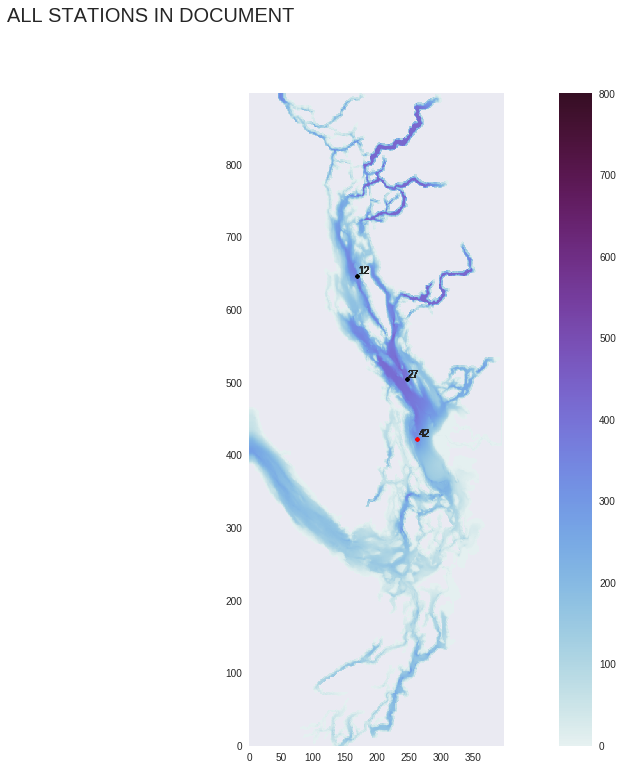

In [12]:

pts_all = len(dic)

stnlist = []
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(bathy, cmap=cmocean.cm.dense, vmin = 0, vmax = 800)
for w in range(0,pts_all):
    if (stn[w] == 12):
        j, i = geo_tools.find_closest_model_point(lon[w],lat[w],nav_lon,nav_lat)
        ax.plot(i,j,'k.')
        ax.text(i+2,j+2,'12')
    if (stn[w] == 27):
        j, i = geo_tools.find_closest_model_point(lon[w],lat[w],nav_lon,nav_lat)
        ax.plot(i,j,'k.')
        ax.text(i+2,j+2,'27')
    if (stn[w] == 42):
        j, i = geo_tools.find_closest_model_point(lon[w],lat[w],nav_lon,nav_lat)
        ax.plot(i,j,'r.')
        ax.text(i+2,j+2,'42')
fig.colorbar(mesh)
plt.suptitle('ALL STATIONS IN DOCUMENT',fontsize=20)

print('stations which appear to be on land')
print(stnlist)

In [13]:
# st_42 = (stn == 42)
# st_12 = (stn == 12)
# st_27 = (stn == 27)

depth = P[st_27]
DIC_prof = dic[st_27]
OXY_prof = ox[st_27]
sn_prof = S[st_27]
print(depth)

[   1.7    5.3   10.4   20.4   30.3   40.1   50.4   75.3  100.4  125.3
  150.2  175.3  200.2  250.5  300.7  346.1]


In [15]:
# stn 12
# 647
# 168


print(bathy.shape)

print(bathy[647,168])

(898, 398)
355.25
